In [2]:
import dask.dataframe as dd
from IPython.display import display
import numpy as np
import pickle
import matplotlib.pyplot as plt
import ast

parquet_file_path = 'SimulationResults/UltimateAnalysis/TauBeta/tau_beta.parquet'
pickle_file_path = 'SimulationResults/UltimateAnalysis/TauBeta/tau_beta.pickle'
with open(pickle_file_path, 'rb') as f:
    pickle_data = pickle.load(f)
print("parameter_names_used", pickle_data['parameter_names_used'])
print("param_values_list_combination", pickle_data['param_values_list_combination'])
print('partition_data', pickle_data['agent_type_count'])
print("agent_type", pickle_data['agent_type'])
print("agent_names", pickle_data['agent_names'])

ddf = dd.read_parquet(parquet_file_path, engine='pyarrow', 
                      include_partition_columns=True, 
                      gather_statistics=True, 
                      dtype_backend='pyarrow')

parameter_names_used ['tau_vector', 'B_matrix', 'washout']
param_values_list_combination [[0.5, 1.1, 1.7, 2.3, 2.9, 3.5, inf], [0.0, 20.0, 40.0, 60.0, 80.0, 100.0, inf], [0.0, 0.02, 0.05]]
partition_data [3, 2, 8, 3]
agent_type ['Resources', 'Resources', 'Resources', 'Uninfected Bacteria', 'Uninfected Bacteria', 'Infected Bacteria', 'Infected Bacteria', 'Infected Bacteria', 'Infected Bacteria', 'Infected Bacteria', 'Infected Bacteria', 'Infected Bacteria', 'Infected Bacteria', 'Phages', 'Phages', 'Phages']
agent_names ['R0', 'R1', 'R2', 'B0', 'B1', 'Infected B0', 'Infected B1', 'Infected B2', 'Infected B3', 'P0', 'P1', 'P2']


In [35]:
from turtle import color

def create_tau_r(fixed_washout):
    fig, ax = plt.subplots(7, 7, figsize=(25, 25))
    # plt.title(r"Exponential Growth vs Logistic Growth, $P_0=1$, $r=0.5$, $K=200$", fontsize=18)
    fig.suptitle(r"Simulation Results, varying $\tau$ and $r$, $w^o$ = " + f"{fixed_washout}", fontsize=30)

    def bacteria_summary(bacteria):
        return np.sum(bacteria, axis=0)
    print(pickle_data['param_values_list_combination'])
    for i, tau_value in enumerate(pickle_data['param_values_list_combination'][0]):
        for j, beta_matrix in enumerate(pickle_data['param_values_list_combination'][1]):
            simulation_results = ddf.query(f'tau_vector == {tau_value} and B_matrix == {beta_matrix} and washout == {fixed_washout}').compute()
            t_values = np.array(ast.literal_eval(simulation_results['t_values'].iloc[0]))
            y_values = np.array(ast.literal_eval(simulation_results['y_values'].iloc[0]))
            ax[i, j].plot(t_values, y_values[0], label=f'R0', color="red")
            ax[i, j].plot(t_values, y_values[1], label=f'R1', color="orange")
            ax[i, j].plot(t_values, y_values[2], label=f'R2', color="darkred")
            
            bac_sum = bacteria_summary(y_values[3:13])
            ax[i, j].plot(t_values, bac_sum, label=f'B Sum', color="black")
            
            ax[i, j].plot(t_values, y_values[-3], label=f'P0', color="blue")
            ax[i, j].plot(t_values, y_values[-2], label=f'P1', color="green")
            ax[i, j].plot(t_values, y_values[-1], label=f'P2', color="purple")
            
            ax[i, j].set_title(r"$\tau$=" + f"{tau_value:.1f}, " + r"$\beta$=" + f"{beta_matrix:.0f}", fontsize=20)
            if (j == 0):
                ax[i, j].set_ylabel('y_values', fontsize=25)
            if (i == 6):
                ax[i, j].set_xlabel('Time', fontsize=25)
            if (i == 0 and j == 6):
                ax[i, j].legend(fontsize=14, loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
            ax[i, j].tick_params(axis='both', which='major', labelsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig(f'LatexReport/Images/Plots/Created/UA/tau_beta_washout_{fixed_washout}.png')

[[0.5, 1.1, 1.7, 2.3, 2.9, 3.5, inf], [0.0, 20.0, 40.0, 60.0, 80.0, 100.0, inf], [0.0, 0.02, 0.05]]


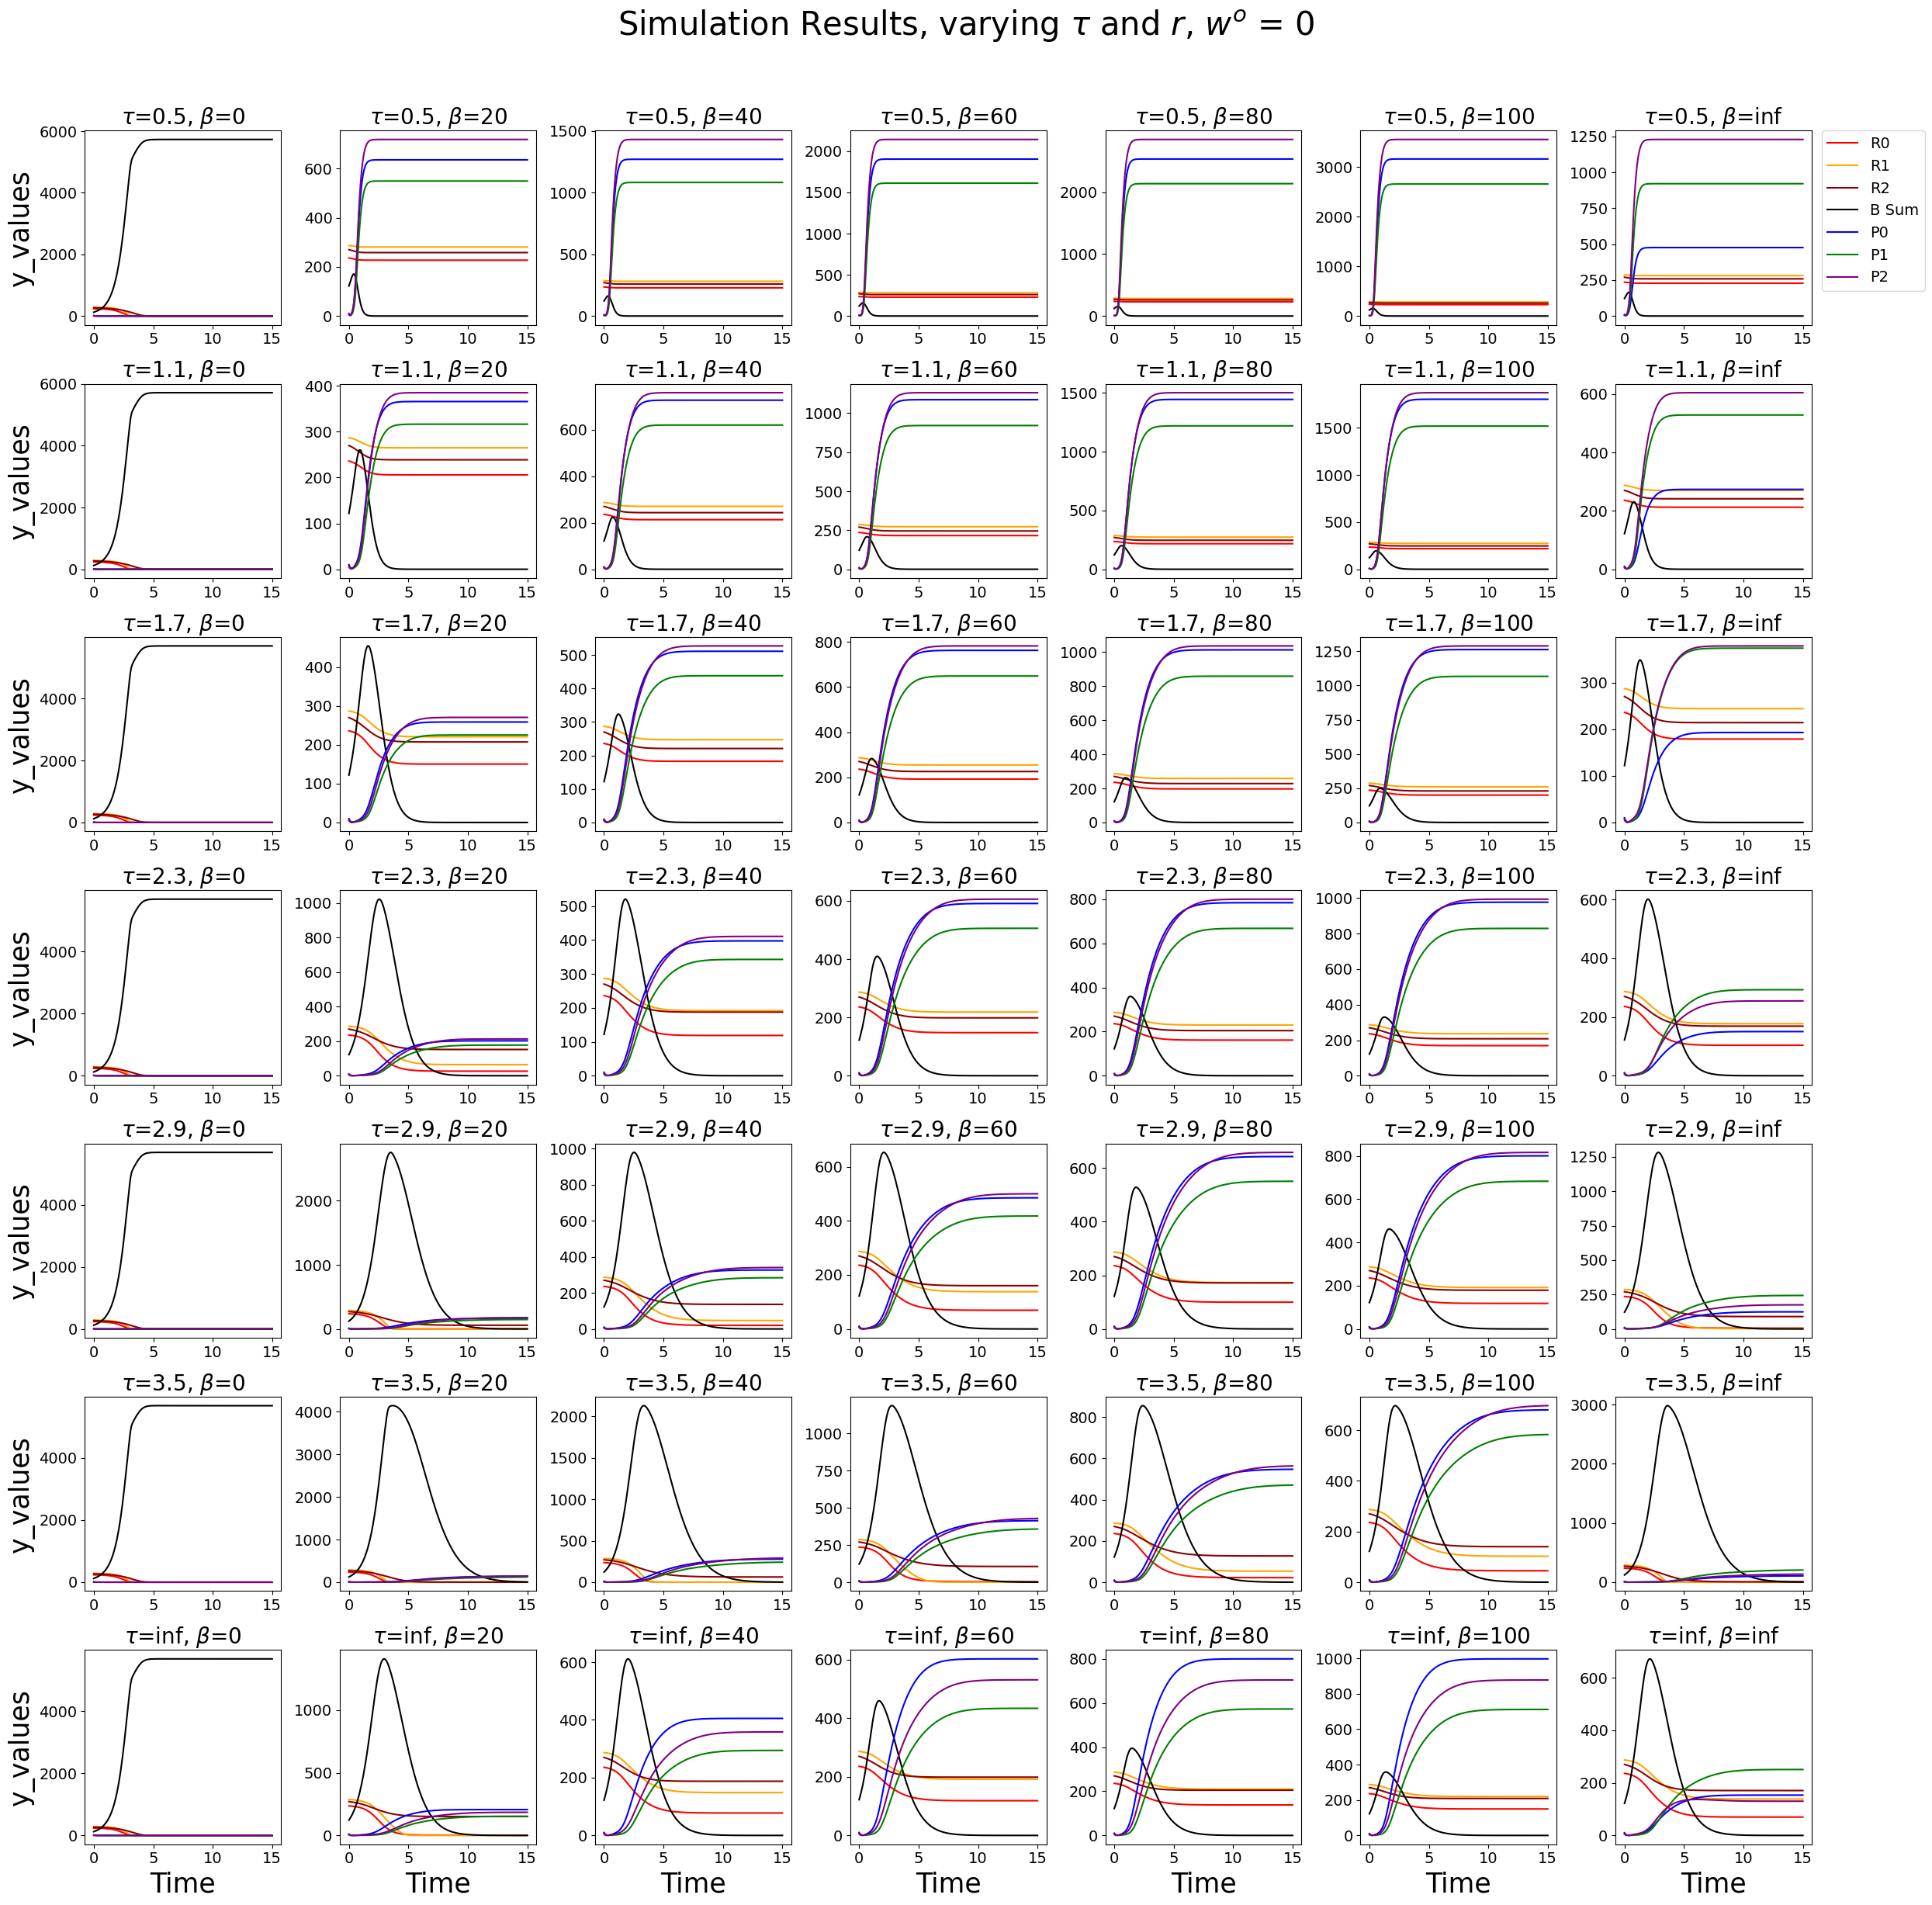

In [36]:
fixed_washout = 0
create_tau_r(fixed_washout)

[[0.5, 1.1, 1.7, 2.3, 2.9, 3.5, inf], [0.0, 20.0, 40.0, 60.0, 80.0, 100.0, inf], [0.0, 0.02, 0.05]]


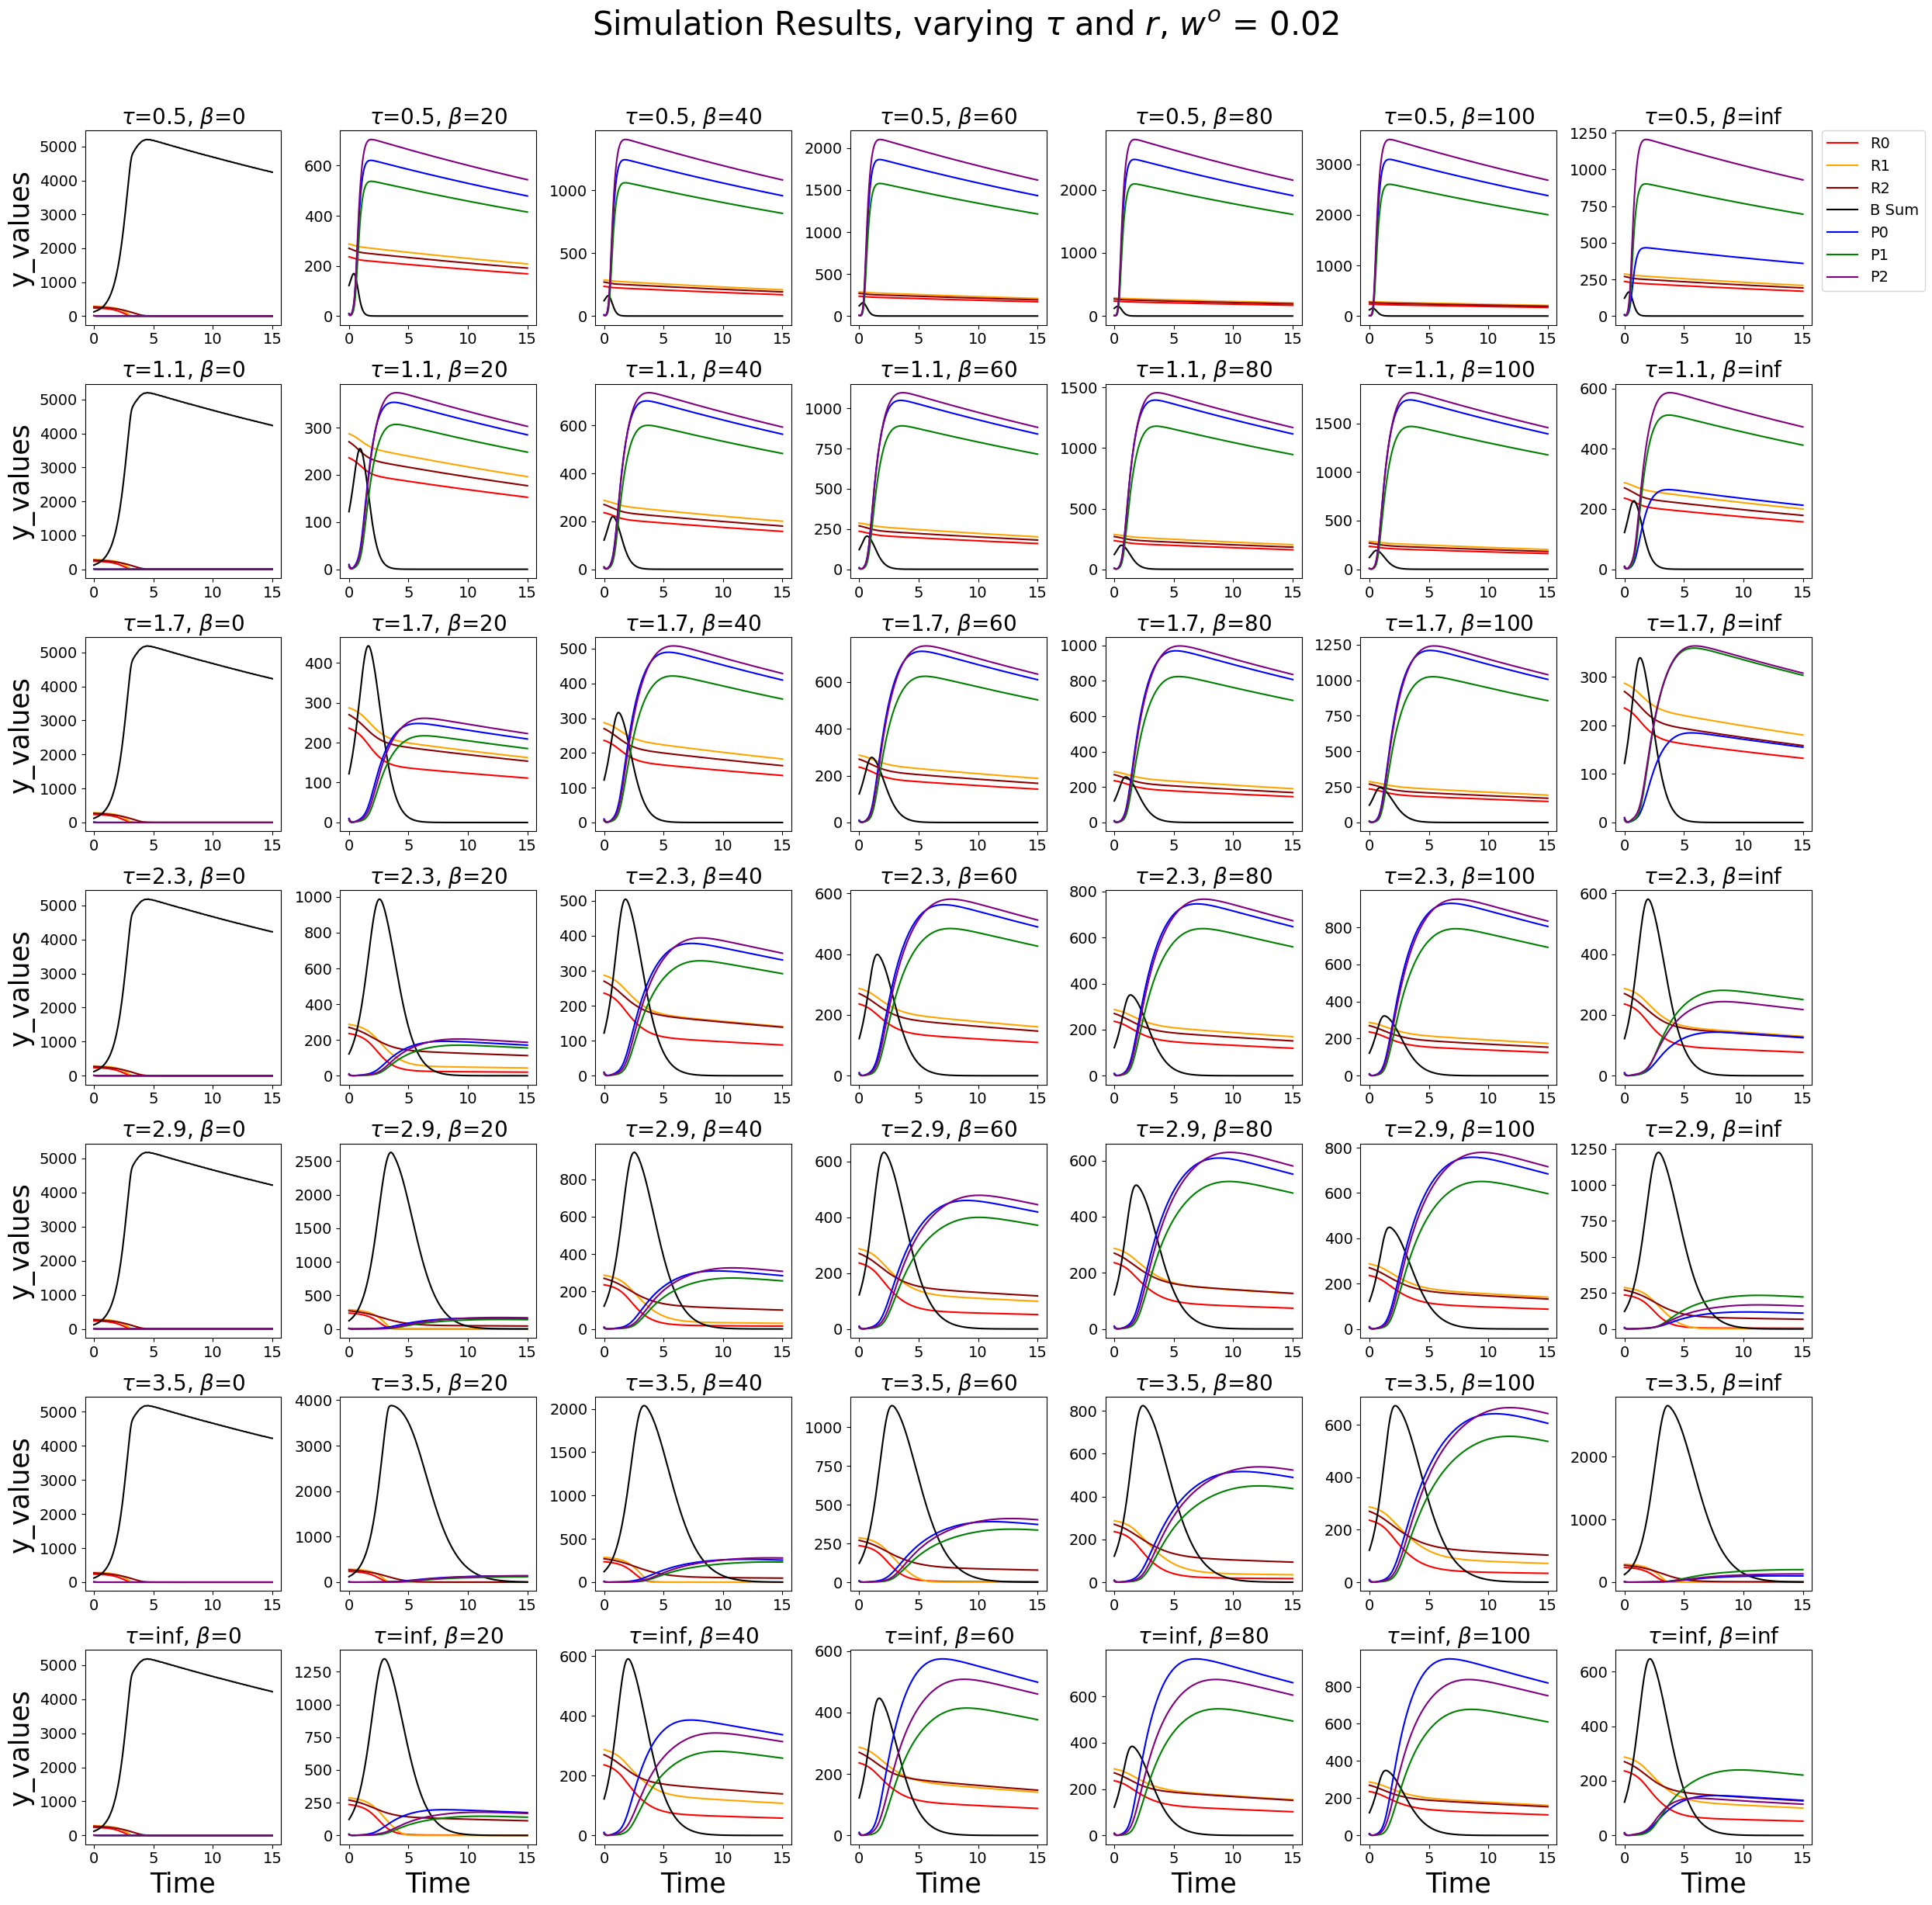

In [37]:
fixed_washout = 0.02
create_tau_r(fixed_washout)

[[0.5, 1.1, 1.7, 2.3, 2.9, 3.5, inf], [0.0, 20.0, 40.0, 60.0, 80.0, 100.0, inf], [0.0, 0.02, 0.05]]


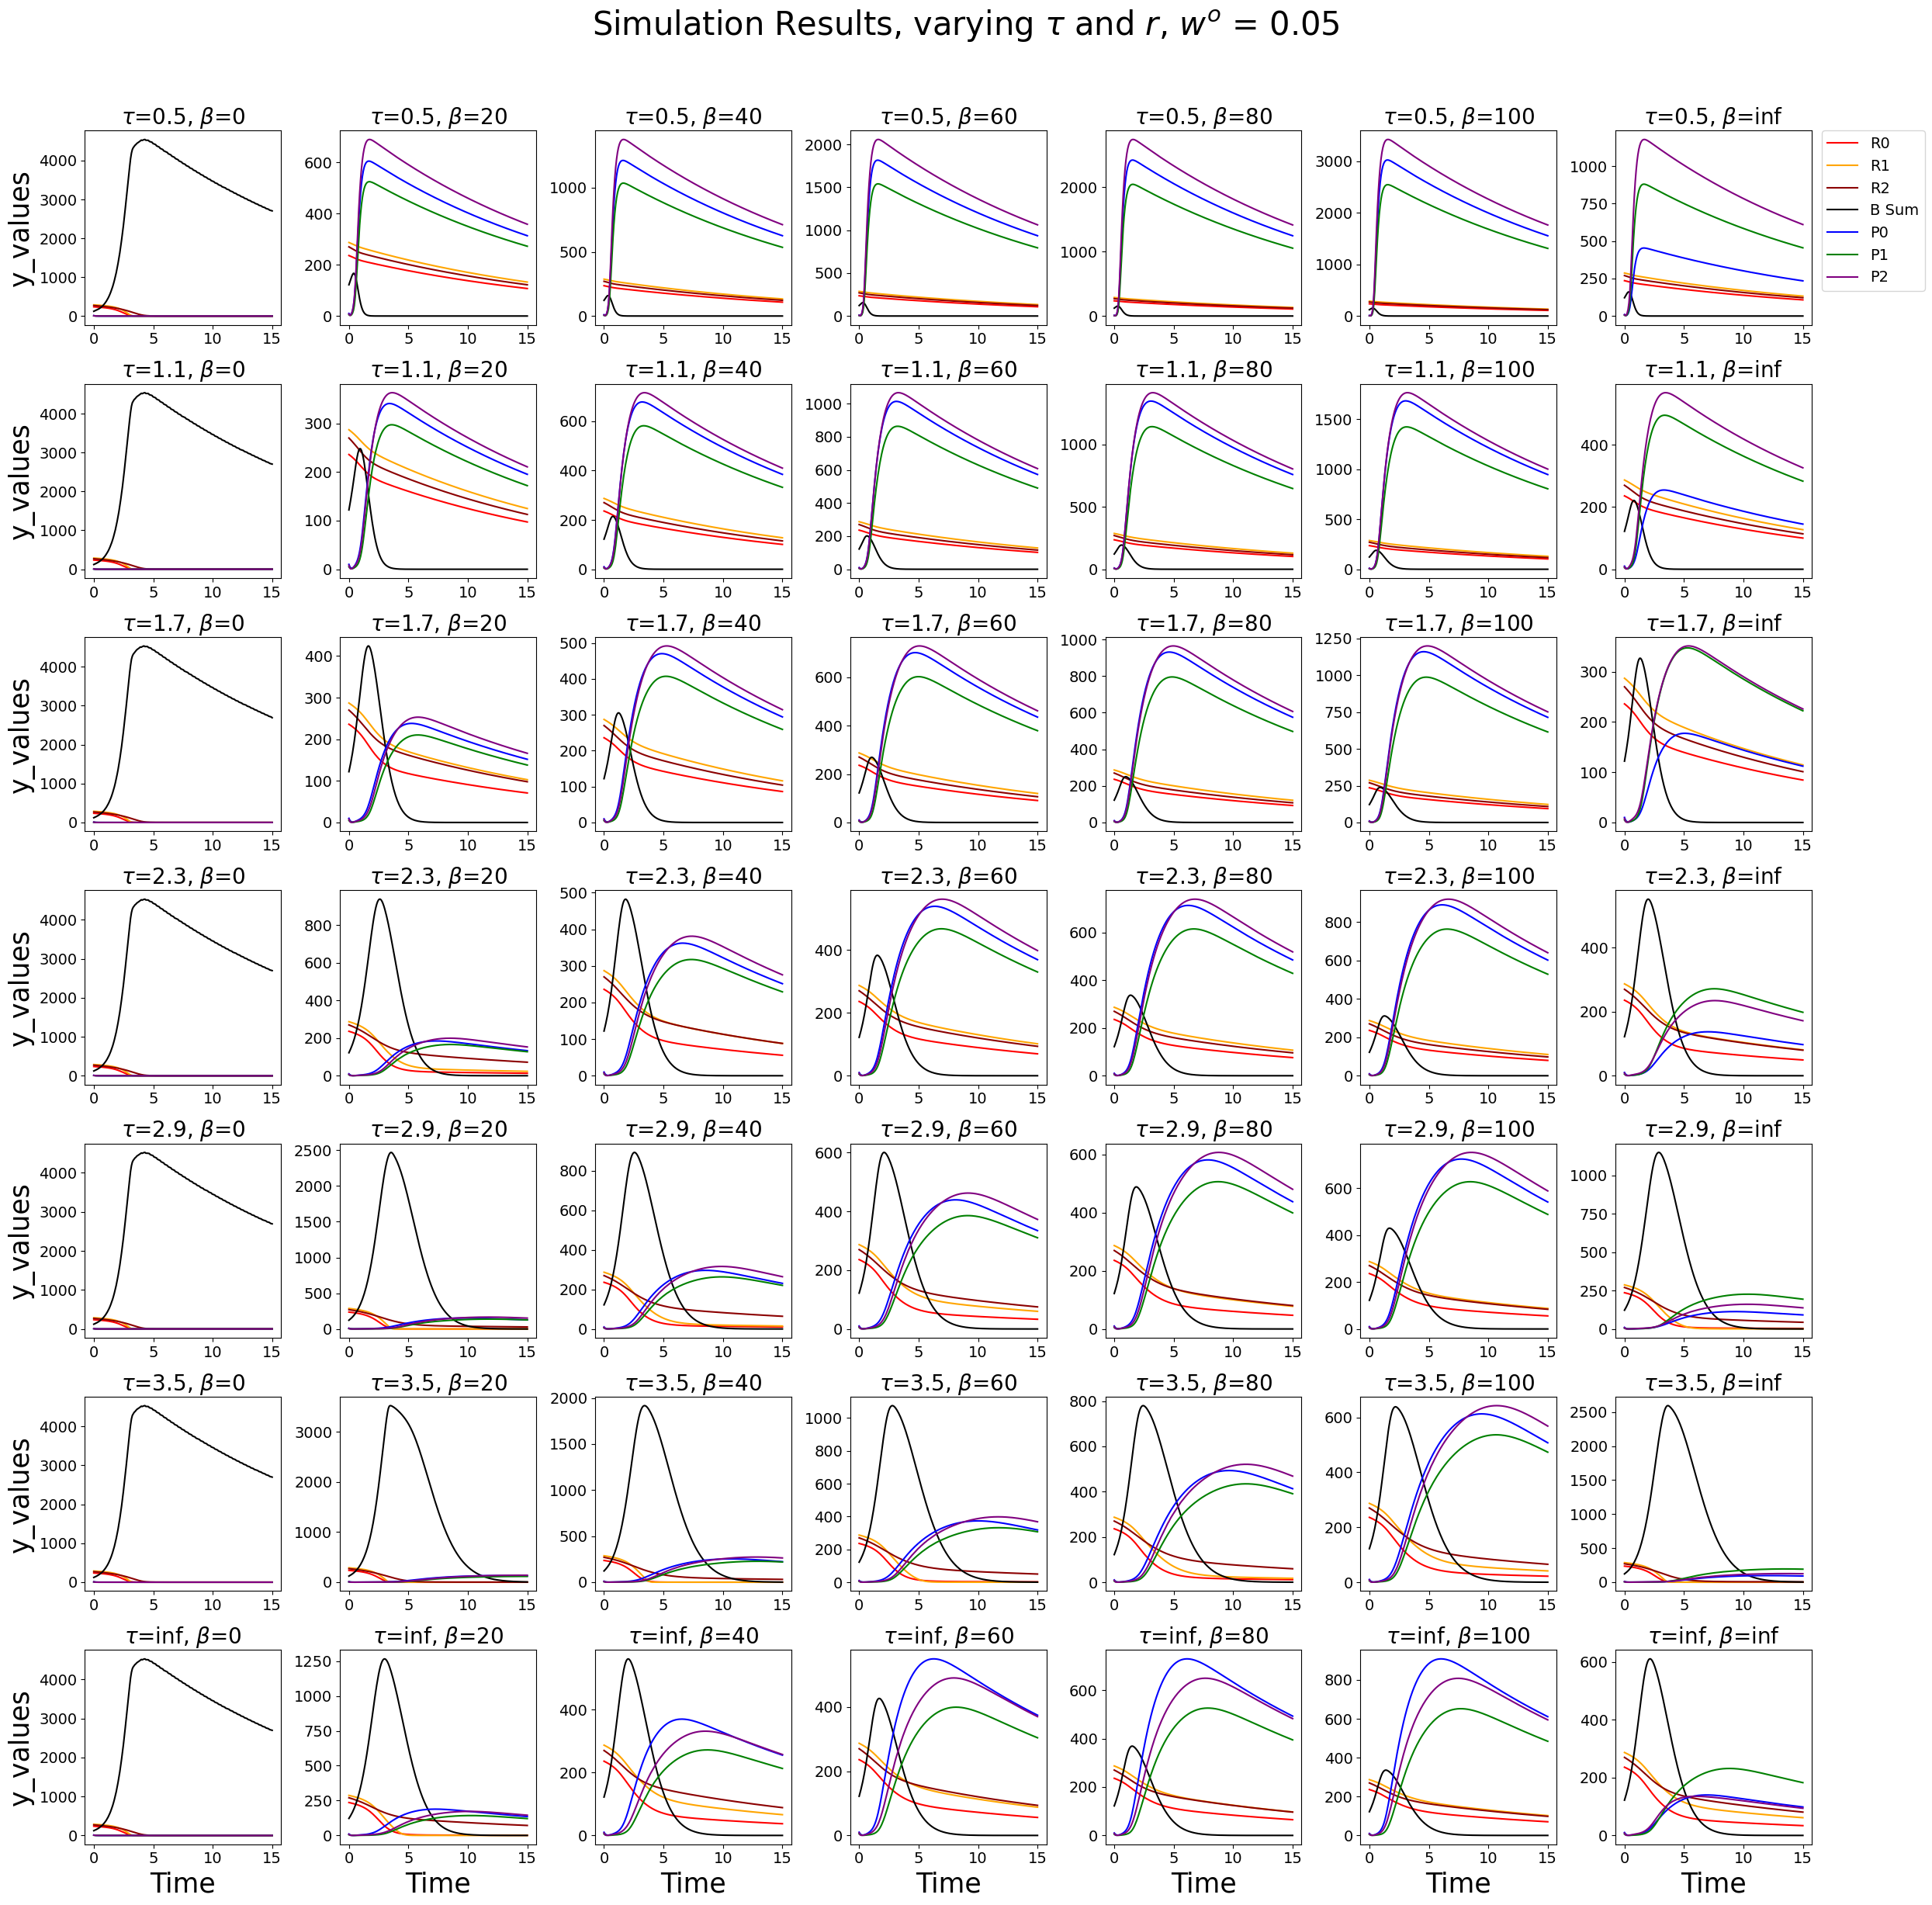

In [39]:
fixed_washout = 0.05
create_tau_r(fixed_washout)